# Summer Datathon baseline 1:

In [143]:
# import libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

# preprocessing 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, SelectFromModel


# models 
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

# hyparameter optimization
from sklearn import model_selection
from skopt import space,gp_minimize
from functools import partial
# from hyperopt import hp,fmin,tpe,Trials
# from hyperopt.pyll.base import scope
import optuna


## Load the dataset

In [144]:
TRAIN_FILE= os.getcwd() +"/datathon-summer-2023-northeastern-university/train.csv"

In [145]:
# read the dataset 
df=pd.read_csv(TRAIN_FILE)

In [146]:
df.head(10)

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
0,eac9059b997a667954a1c2f19079c463,NaN,36 months,0.0,91th week,UT,130000.0,INDIVIDUAL,BAT3016651,0.0,...,D2,Debt consolidation,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,841xx,28.0
1,f2bdbfe82b2a63a35726cb1a630af56a,NaN,36 months,0.0,4th week,LA,50000.0,INDIVIDUAL,BAT1184694,0.0,...,D2,Business,138.0,115674.0,11.84,0.0,49000.0,Verified,701xx,39.0
2,0a73ee5d7841b012f1fb62542d7664c7,NaN,36 months,0.0,65th week,VA,40000.0,INDIVIDUAL,BAT2078974,0.0,...,C1,Debt consolidation,0.0,40075.0,1689.09,0.0,17600.0,Verified,241xx,29.0
3,d9a39c969e294fe16601279e114fc9c0,< 1 year,60 months,0.0,9th week,MI,50000.0,INDIVIDUAL,BAT4106493,0.0,...,F2,Credit card refinancing,0.0,20459.0,348.68,0.0,20100.0,Source Verified,480xx,15.0
4,3a44d3ab14792dcc7aaf391db0bdb72c,5 years,36 months,0.0,139th week,NC,45000.0,INDIVIDUAL,,0.0,...,B5,debt consolidation,0.0,100987.0,2164.96,0.0,15000.0,Verified,282xx,18.0
5,7329bd9add3d36491dcdac349ef083d5,8 years,36 months,0.0,17th week,FL,60000.0,INDIVIDUAL,BAT1780517,0.0,...,C4,Credit card refinancing,0.0,157424.0,470.23,0.0,13700.0,Not Verified,330xx,11.0
6,91289eff769478da64fcbff4ce07dc53,NaN,36 months,0.0,65th week,AZ,70000.0,INDIVIDUAL,BAT3193689,0.0,...,C2,Credit card refinancing,0.0,30094.0,2663.04,0.0,25300.0,Source Verified,853xx,25.0
7,7a9579563172c12cddce814df79d1fd7,3 years,36 months,0.0,113th week,WI,34000.0,INDIVIDUAL,NaN,0.0,...,D1,Pay Debt,0.0,13818.0,3098.93,0.0,22200.0,Not Verified,544xx,25.0
8,d2a8498857d920f263f2f9d16683e4a9,10+ years,60 months,0.0,74th week,UT,100000.0,INDIVIDUAL,BAT3193689,0.0,...,E1,Home improvement,0.0,281639.0,7363.33,0.0,10000.0,Source Verified,847xx,7.0
9,403a6e450ee384f86c70bcadbf72cff2,1 year,36 months,0.0,4th week,WI,95000.0,INDIVIDUAL,BAT2803411,0.0,...,B4,Credit card refinancing,0.0,244021.0,138.32,0.0,31500.0,Not Verified,532xx,18.0


Let's get some information about the dataset

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419040 entries, 0 to 419039
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          419040 non-null  object 
 1   time        397052 non-null  object 
 2   duration    419040 non-null  object 
 3   feature_0   419040 non-null  float64
 4   checkpoint  419040 non-null  object 
 5   feature_1   419040 non-null  object 
 6   feature_2   419040 non-null  float64
 7   feature_3   419040 non-null  object 
 8   feature_4   357082 non-null  object 
 9   feature_5   419040 non-null  float64
 10  feature_6   419040 non-null  float64
 11  feature_7   419040 non-null  float64
 12  feature_8   419040 non-null  float64
 13  feature_9   394776 non-null  object 
 14  feature_10  419040 non-null  int64  
 15  feature_11  419040 non-null  float64
 16  feature_12  419040 non-null  object 
 17  feature_13  419040 non-null  object 
 18  feature_14  419040 non-null  object 
 19  fe

In [148]:
df.describe()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,feature_22,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,target
count,419040.000000,4.190400e+05,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,419040.000000,...,419040.000000,419040.000000,4.190400e+05,418857.000000,4.190400e+05,4.190400e+05,419040.000000,419040.000000,4.190400e+05,419040.000000
mean,0.005329,7.548509e+04,4.141652,0.015765,0.328026,18.504864,14997.521418,14991.218903,0.669521,13.299535,...,0.208169,39.961678,1.712163e+04,55.223681,2.358979e+02,1.395292e+05,1692.512609,0.321974,3.205100e+04,25.510887
std,0.079510,6.460105e+04,51.673850,0.142355,0.879557,23.368626,8445.489865,8442.098986,0.956271,4.410936,...,0.587265,377.826759,2.226594e+04,23.481539,1.425897e+04,1.540478e+05,2009.691720,3.634503,3.557288e+04,11.844083
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1000.000000,925.000000,0.000000,5.320000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.000000
25%,0.000000,4.600000e+04,0.000000,0.000000,0.000000,12.180000,8400.000000,8400.000000,0.000000,9.990000,...,0.000000,0.000000,6.579000e+03,38.000000,0.000000e+00,2.985775e+04,421.730000,0.000000,1.400000e+04,17.000000
50%,0.000000,6.500000e+04,0.000000,0.000000,0.000000,17.970000,13500.000000,13500.000000,0.000000,12.990000,...,0.000000,0.000000,1.202500e+04,56.000000,0.000000e+00,8.061050e+04,1037.570000,0.000000,2.370000e+04,24.000000
75%,0.000000,9.000000e+04,0.000000,0.000000,0.000000,24.360000,20000.000000,20000.000000,1.000000,16.290000,...,0.000000,0.000000,2.106000e+04,73.400000,0.000000e+00,2.081768e+05,2168.445000,0.000000,3.980000e+04,32.000000
max,6.000000,9.000000e+06,5694.093600,20.000000,27.000000,9999.000000,35000.000000,35000.000000,7.000000,28.990000,...,49.000000,33520.270000,2.560703e+06,166.900000,9.152545e+06,8.000078e+06,21625.990000,242.550000,9.999999e+06,156.000000


## A little bit of EDA 

What is in the `checkpoint` column?

In [149]:
df.checkpoint.unique()

array(['91th week', '4th week', '65th week', '9th week', '139th week',
       '17th week', '113th week', '74th week', '52th week', '69th week',
       '117th week', '35th week', '43th week', '87th week', '22th week',
       '78th week', '13th week', '26th week', '61th week', '31th week',
       '100th week', '48th week', '152th week', '83th week', '39th week',
       '143th week', '82th week', '131th week', '56th week', '126th week',
       'NAth week', '44th week', '156th week', '96th week', '70th week',
       '57th week', '104th week', '144th week', '8th week', '109th week',
       '135th week', '122th week', '30th week', '95th week', '148th week',
       '130th week', '18th week', '21th week', '161th week', '169th week',
       '92th week', '108th week', '178th week', '121th week', '0th week',
       '170th week', '165th week', '174th week'], dtype=object)

What about the `duration` column?

In [150]:
df.duration.unique()

array(['36 months', '60 months'], dtype=object)

`Time` column

In [151]:
df.time.unique()

array([nan, '< 1 year', '5 years', '8 years', '3 years', '10+ years',
       '1 year', '2 years', '9 years', '7 years', '4 years', '6 years'],
      dtype=object)

There are some categorical variables in the anonymized features. Let's see what unique values these columns have.

In [152]:
col_names=list(df.columns)

In [153]:
feats=[i for i in col_names if re.search("^feature",i)]

In [154]:
for i in feats:
    if len(df[i].unique())<100:
        print(f"Unique values in column `{i}`: --- {df[i].unique()}")

Unique values in column `feature_0`: --- [0. 1. 2. 3. 5. 4. 6.]
Unique values in column `feature_1`: --- ['UT' 'LA' 'VA' 'MI' 'NC' 'FL' 'AZ' 'WI' 'KY' 'CA' 'NY' 'MT' 'MN' 'MO'
 'OR' 'GA' 'TN' 'WY' 'OH' 'IN' 'TX' 'IL' 'MA' 'RI' 'NE' 'NJ' 'AL' 'OK'
 'PA' 'SC' 'MD' 'WA' 'NH' 'NV' 'CT' 'DE' 'MS' 'WV' 'CO' 'SD' 'HI' 'AR'
 'DC' 'KS' 'NM' 'AK' 'VT' 'ME' 'ND' 'IA' 'ID']
Unique values in column `feature_3`: --- ['INDIVIDUAL' 'JOINT']
Unique values in column `feature_4`: --- ['BAT3016651' 'BAT1184694' 'BAT2078974' 'BAT4106493' ' ' 'BAT1780517'
 'BAT3193689' nan 'BAT2803411' 'BAT1467036' 'BAT2136391' 'BAT224923'
 'BAT5489674' 'BAT3274746' 'BAT3873588' 'BAT6248271' 'BAT1766061'
 'BAT5924421' 'BAT4217242' 'BAT2252229' 'BAT3461431' 'BAT4664105'
 'BAT5662637' 'BAT5241177' 'BAT4127326' 'BAT1104812' 'BAT5349407'
 'BAT3369838' 'BAT1586599' 'BAT3865626' 'BAT6004464' 'BAT4271519'
 'BAT2833642' 'BAT2333412' 'BAT4268557' 'BAT3840785' 'BAT3726927'
 'BAT4031849' 'BAT422167' 'BAT1930365' 'BAT3938478' 'BAT41361

On retrospect, there is one more categorical variable.

In [155]:
df.feature_9.unique()

array([nan, 'Sales Rep', 'advance auto parts', ..., 'Production  Manager',
       'Forlit driver', 'Fingerprint Technician'], dtype=object)

Feature 9 seems to be representing something like profession of a person. Do we need that? 

In [156]:
len(df.feature_9.unique())

143909

And... `feature_29` seems to be a text column. Let's keep that out for this version.

In [157]:
df.feature_29.unique()

array(['Debt consolidation', 'Business', 'Credit card refinancing', ...,
       'Refinance 36 payments', 'making changes',
       'Credit card re-finance'], dtype=object)

Finally, there is feature 36, and it seems to be capturing something. Seems like postal code.

In [158]:
df.feature_36.unique()[:10]

array(['841xx', '701xx', '241xx', '480xx', '282xx', '330xx', '853xx',
       '544xx', '847xx', '532xx'], dtype=object)

From the above output, we can see that the following features are categorical among the anonymized features:

- feature_1
- feature_3
- feature_4
- feature_9
- feature_12
- feature_13
- feature_14
- feature_23
- feature_28
- feature_35
- feature_36

And there are some ambiguous features as well:
- feature_0
- feature_7
- feature_15


`feature_29` and `feature_9` are text columns that need to be handled differently. We can probably take them out too. Atleast for this version.

### Data Visualization

In [159]:
# categorical columns
cat_cols= ['feature_1', 'feature_3', 
           'feature_4',
           'feature_12', 'feature_13', 'feature_14',
           'feature_23',
           'feature_28', 'feature_35','feature_36'
          ]

# ordinal columns
encode_cols=['time','duration','checkpoint']

# numerical columns
remove=cat_cols+encode_cols + ['id','target', 'feature_24', 'feature_29','feature_9']
num_cols=[i for i in col_names if i not in remove]

Can we do a correlation matrix for the numerical columns?

<Axes: >

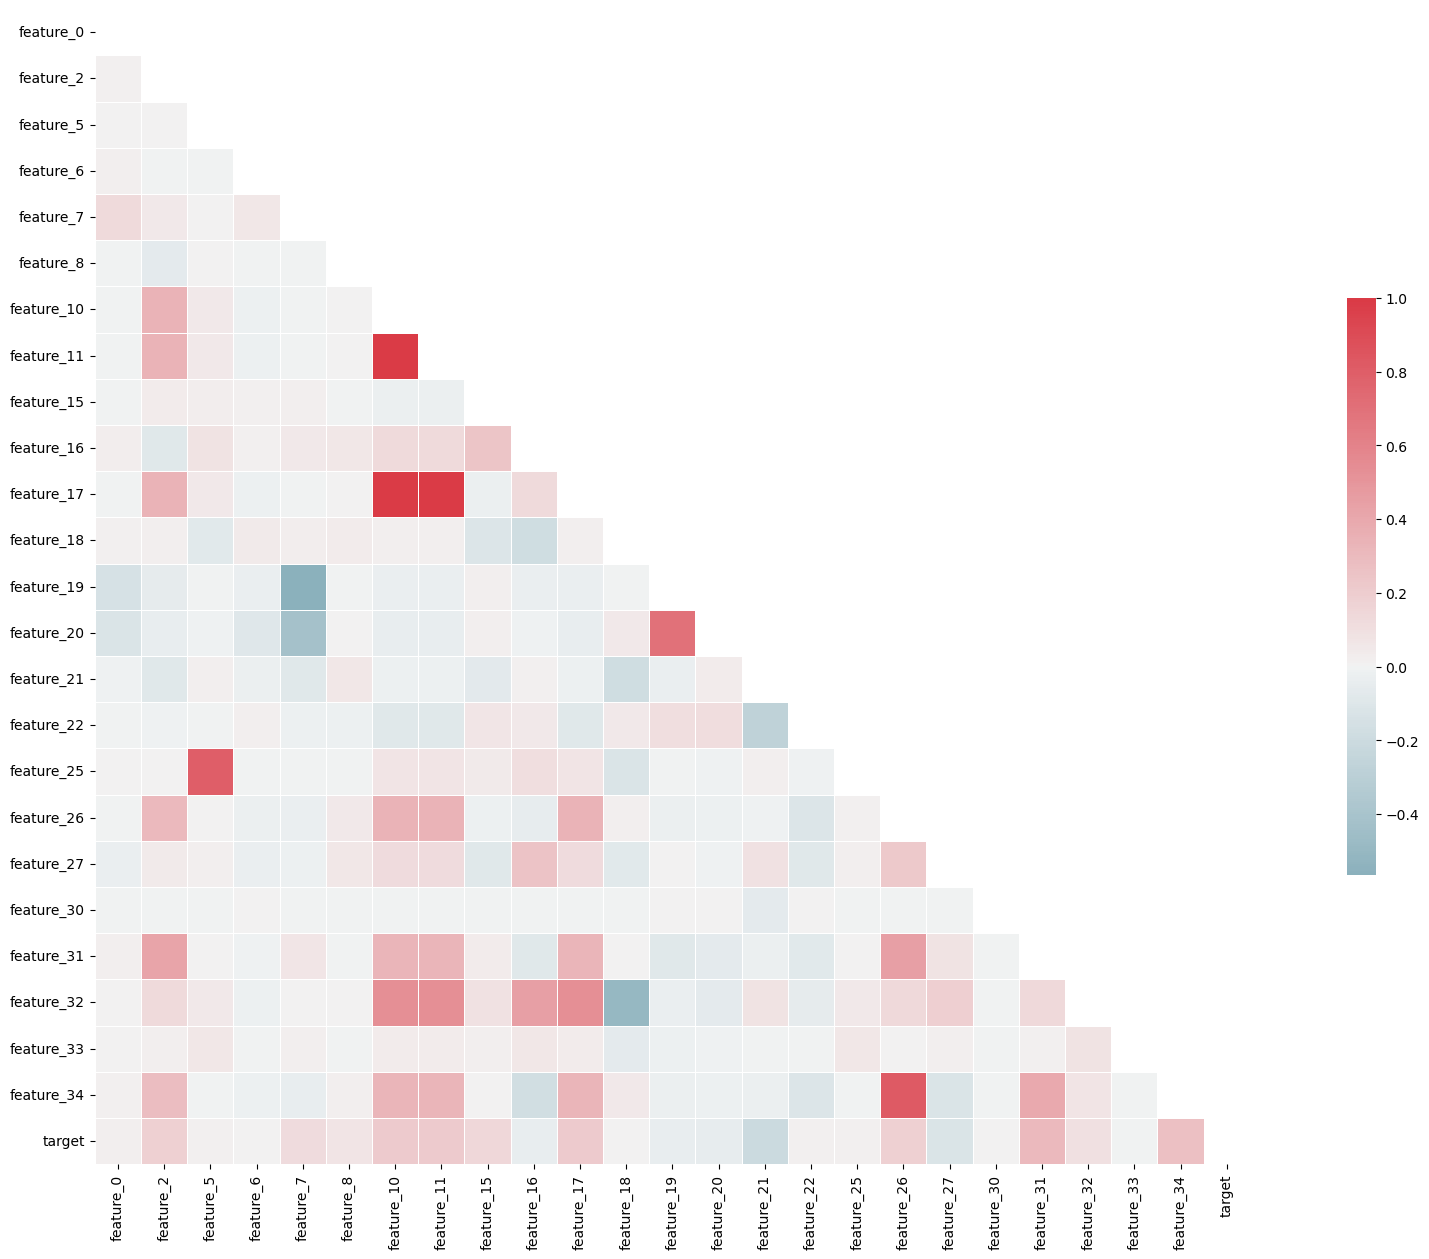

In [160]:
# calculate correlation
corr=df[num_cols + ['target']].corr()

mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax=plt.subplots(figsize=(25,15))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

What if we set a threshold for correlation values and select columns which have correlation higher than the target.

In [161]:
threshold=0.5 # threshold for correlation
k={} #empty dictionary

for i in corr.columns:
    corr_dict=corr[i].to_dict()
    for j in corr_dict:
        if threshold<=corr_dict[j]<1: #correlation is greater than threshold
            k[corr_dict[j]]=sorted((i,j))

We can look out for columns that are highly correlated to each other because they can introduce multicollinearity in the model 

In [162]:
{i:j for i,j in k.items() if 'target' not in j}

{0.8031958780327961: ['feature_25', 'feature_5'],
 0.9999947199386638: ['feature_10', 'feature_11'],
 0.9999982500472622: ['feature_10', 'feature_17'],
 0.5347572163459301: ['feature_10', 'feature_32'],
 0.9999929327259102: ['feature_11', 'feature_17'],
 0.5347622738492319: ['feature_11', 'feature_32'],
 0.5347615693620777: ['feature_17', 'feature_32'],
 0.697635712463996: ['feature_19', 'feature_20'],
 0.8218643442248749: ['feature_26', 'feature_34']}

So, there is a lot of useful information in the above correlation plot. For now, I'll just ignore it all. We can use this information in the second baseline and later versions. Let's focus on getting a primary model up and running.

But before that, let's try one more visualization.

In [163]:
# commented out to speed up reruns 
# sns.pairplot(df[num_cols+['target']])

We'll refine that plot later.

In [164]:
# there are some high variance variables here
df.var(numeric_only=True)

feature_0     6.321848e-03
feature_2     4.173295e+09
feature_5     2.670187e+03
feature_6     2.026508e-02
feature_7     7.736198e-01
feature_8     5.460927e+02
feature_10    7.132630e+07
feature_11    7.126904e+07
feature_15    9.144541e-01
feature_16    1.945635e+01
feature_17    7.132705e+07
feature_18    5.234334e+14
feature_19    4.787853e+02
feature_20    4.920879e+02
feature_21    7.471034e+02
feature_22    3.448802e-01
feature_25    1.427531e+05
feature_26    4.957723e+08
feature_27    5.513827e+02
feature_30    2.033182e+08
feature_31    2.373074e+10
feature_32    4.038861e+06
feature_33    1.320961e+01
feature_34    1.265430e+09
target        1.402823e+02
dtype: float64

We can visuailze the distribution of the numrical variables.

In [165]:
# fig = plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace=1.0, wspace=0.5)
# for i,j in enumerate(num_cols):
#     ax=fig.add_subplot(12,2,i+1)
#     sns.histplot(df,x=j,ax=ax)
# plt.show()
     

## Data Preprocessing

In [166]:
TRAIN_FILE= os.getcwd() +"/datathon-summer-2023-northeastern-university/train.csv"

# read the dataset 
df=pd.read_csv(TRAIN_FILE)

In [167]:
# some extra columns to remove from the data right now 
df.drop(columns=['feature_29','feature_9'],inplace=True)

__We can log transform the feature and train a model on that. This will allow us to better optimize according to the metric we have.__

In [168]:
df.target=df.target.apply(lambda x: np.log(1 + x))

### What columns are what?

In [169]:
col_names=list(df.columns)

# categorical columns
cat_cols= ['feature_1', 'feature_3', 
           'feature_4',
           'feature_12', 'feature_13', 'feature_14',
           'feature_23','feature_24',
           'feature_28', 'feature_35','feature_36'
          ]

# ordinal columns
encode_cols=['time','duration','checkpoint']

# numerical columns
remove=cat_cols+encode_cols + ['id','target', 'feature_29','feature_9']
num_cols=[i for i in col_names if i not in remove]

## Feature Engineering 

Create binning features for numerical columns

In [170]:
bin_10=[]
bin_100=[]

for col in num_cols:
    if len(df[col].value_counts())>1000:
        df[f"{col}_100"]= pd.cut(df[col], bins=100, labels=False)
        bin_100.append(col)
    else:
        df[f"{col}_10"]= pd.cut(df[col], bins=10, labels=False)
        bin_10.append(col)

In [171]:
df.head()

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_21_10,feature_22_10,feature_25_100,feature_26_100,feature_27_100,feature_30_100,feature_31_100,feature_32_100,feature_33_100,feature_34_100
0,eac9059b997a667954a1c2f19079c463,NaN,36 months,0.0,91th week,UT,130000.0,INDIVIDUAL,BAT3016651,0.0,...,NaN,0,0,1,54.0,0,0,26,0,0
1,f2bdbfe82b2a63a35726cb1a630af56a,NaN,36 months,0.0,4th week,LA,50000.0,INDIVIDUAL,BAT1184694,0.0,...,NaN,0,0,0,30.0,0,1,0,0,0
2,0a73ee5d7841b012f1fb62542d7664c7,NaN,36 months,0.0,65th week,VA,40000.0,INDIVIDUAL,BAT2078974,0.0,...,NaN,0,0,0,42.0,0,0,7,0,0
3,d9a39c969e294fe16601279e114fc9c0,< 1 year,60 months,0.0,9th week,MI,50000.0,INDIVIDUAL,BAT4106493,0.0,...,NaN,0,0,0,6.0,0,0,1,0,0
4,3a44d3ab14792dcc7aaf391db0bdb72c,5 years,36 months,0.0,139th week,NC,45000.0,INDIVIDUAL,,0.0,...,9.0,0,0,0,43.0,0,1,10,0,0


Create some polynomial features 

In [172]:
pf = preprocessing.PolynomialFeatures(
degree=2, interaction_only=False, include_bias=False
)

si=SimpleImputer(missing_values=np.nan, strategy='mean')
df_transformed=si.fit_transform(df[num_cols])

# create polynomial features
poly_feats = pf.fit_transform(df_transformed)

# create a dataframe with all the features
num_feats = poly_feats.shape[1]

df_transformed = pd.DataFrame(poly_feats,columns=[f"f_{i}" for i in range(1, num_feats + 1)])

In [173]:
df_transformed.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_315,f_316,f_317,f_318,f_319,f_320,f_321,f_322,f_323,f_324
0,0.0,130000.0,0.0,0.0,0.0,18.89,25000.0,25000.0,4.0,17.57,...,1.582369e+09,2.267868e+08,0.0,1.487735e+09,3.250334e+07,0.0,213223758.0,0.0,0.0,1.398760e+09
1,0.0,50000.0,0.0,0.0,3.0,27.12,5000.0,5000.0,3.0,16.55,...,1.338047e+10,1.369580e+06,0.0,5.668026e+09,1.401856e+02,0.0,580160.0,0.0,0.0,2.401000e+09
2,0.0,40000.0,0.0,0.0,0.0,27.87,12500.0,12500.0,0.0,12.99,...,1.606006e+09,6.769028e+07,0.0,7.053200e+08,2.853025e+06,0.0,29727984.0,0.0,0.0,3.097600e+08
3,0.0,50000.0,0.0,0.0,1.0,18.24,21000.0,20950.0,3.0,22.99,...,4.185707e+08,7.133644e+06,0.0,4.112259e+08,1.215777e+05,0.0,7008468.0,0.0,0.0,4.040100e+08
4,0.0,45000.0,0.0,0.0,0.0,13.31,9500.0,9500.0,0.0,14.09,...,1.019837e+10,2.186328e+08,0.0,1.514805e+09,4.687052e+06,0.0,32474400.0,0.0,0.0,2.250000e+08


In [174]:
df=pd.concat([df,df_transformed],axis=1)

In [175]:
df.head(10)

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,f_315,f_316,f_317,f_318,f_319,f_320,f_321,f_322,f_323,f_324
0,eac9059b997a667954a1c2f19079c463,NaN,36 months,0.0,91th week,UT,130000.0,INDIVIDUAL,BAT3016651,0.0,...,1.582369e+09,2.267868e+08,0.0,1.487735e+09,3.250334e+07,0.0,213223758.0,0.0,0.0,1.398760e+09
1,f2bdbfe82b2a63a35726cb1a630af56a,NaN,36 months,0.0,4th week,LA,50000.0,INDIVIDUAL,BAT1184694,0.0,...,1.338047e+10,1.369580e+06,0.0,5.668026e+09,1.401856e+02,0.0,580160.0,0.0,0.0,2.401000e+09
2,0a73ee5d7841b012f1fb62542d7664c7,NaN,36 months,0.0,65th week,VA,40000.0,INDIVIDUAL,BAT2078974,0.0,...,1.606006e+09,6.769028e+07,0.0,7.053200e+08,2.853025e+06,0.0,29727984.0,0.0,0.0,3.097600e+08
3,d9a39c969e294fe16601279e114fc9c0,< 1 year,60 months,0.0,9th week,MI,50000.0,INDIVIDUAL,BAT4106493,0.0,...,4.185707e+08,7.133644e+06,0.0,4.112259e+08,1.215777e+05,0.0,7008468.0,0.0,0.0,4.040100e+08
4,3a44d3ab14792dcc7aaf391db0bdb72c,5 years,36 months,0.0,139th week,NC,45000.0,INDIVIDUAL,,0.0,...,1.019837e+10,2.186328e+08,0.0,1.514805e+09,4.687052e+06,0.0,32474400.0,0.0,0.0,2.250000e+08
5,7329bd9add3d36491dcdac349ef083d5,8 years,36 months,0.0,17th week,FL,60000.0,INDIVIDUAL,BAT1780517,0.0,...,2.478232e+10,7.402549e+07,0.0,2.156709e+09,2.211163e+05,0.0,6442151.0,0.0,0.0,1.876900e+08
6,91289eff769478da64fcbff4ce07dc53,NaN,36 months,0.0,65th week,AZ,70000.0,INDIVIDUAL,BAT3193689,0.0,...,9.056488e+08,8.014153e+07,0.0,7.613782e+08,7.091782e+06,0.0,67374912.0,0.0,0.0,6.400900e+08
7,7a9579563172c12cddce814df79d1fd7,3 years,36 months,0.0,113th week,WI,34000.0,INDIVIDUAL,NaN,0.0,...,1.909371e+08,4.282101e+07,0.0,3.067596e+08,9.603367e+06,0.0,68796246.0,0.0,0.0,4.928400e+08
8,d2a8498857d920f263f2f9d16683e4a9,10+ years,60 months,0.0,74th week,UT,100000.0,INDIVIDUAL,BAT3193689,0.0,...,7.932053e+10,2.073801e+09,0.0,2.816390e+09,5.421863e+07,0.0,73633300.0,0.0,0.0,1.000000e+08
9,403a6e450ee384f86c70bcadbf72cff2,1 year,36 months,0.0,4th week,WI,95000.0,INDIVIDUAL,BAT2803411,0.0,...,5.954625e+10,3.375298e+07,0.0,7.686662e+09,1.913242e+04,0.0,4357080.0,0.0,0.0,9.922500e+08


In [176]:
col_names=list(df.columns)
num_cols=[i for i in col_names if i not in remove]

In [177]:
def feature_eng(df):
    
    col_names=list(df.columns)

    # categorical columns
    cat_cols= ['feature_1', 'feature_3', 
               'feature_4',
               'feature_12', 'feature_13', 'feature_14',
               'feature_23','feature_24',
               'feature_28', 'feature_35','feature_36'
              ]

    # ordinal columns
    encode_cols=['time','duration','checkpoint']

    # numerical columns
    remove=cat_cols+encode_cols + ['id','target', 'feature_29','feature_9']
    num_cols_in=[i for i in col_names if i not in remove]

    
    #create binning features 
    for col in num_cols_in:
        if col in bin_100:
            df[f"{col}_100"]= pd.cut(df[col], bins=100, labels=False)
        elif col in bin_10:
            df[f"{col}_10"]= pd.cut(df[col], bins=10, labels=False)
    
    
    # remove missing values
    df_transformed=si.transform(df[num_cols_in])

    # create polynomial features
    poly_feats = pf.transform(df_transformed)

    # create a dataframe with all the features
    num_feats = poly_feats.shape[1]

    df_transformed = pd.DataFrame(poly_feats,columns=[f"f_{i}" for i in range(1, num_feats + 1)])
    
    df=pd.concat([df,df_transformed],axis=1)

    return df 
    

## Feature Selection

Can we do some feature selection and remove useless features?

The first and most obvious way is remove features with low variance (close to zero). 

In [178]:
dropped=[]
for i in num_cols:
    if df[i].var() <0.1:
        df.drop(columns=[i], inplace=True)
        dropped.append(i)
    
num_cols=[i for i in num_cols if i not in dropped]

Now, let's try to remove features with high correlation (i.e multicollinearity). 

In [179]:
to_remove=['feature_17','feature_11' # high correlation with f_10
           ,'feature_25','feature_26','feature_19']
num_cols=[i for i in num_cols if i not in to_remove]

In [180]:
X=df.drop(columns=['id','target'])
y=df.target

### Categorical columns

In [181]:
# preprocessing pipeline for categorical variables
cat_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
#     ("encode",OneHotEncoder(dtype='int', handle_unknown='ignore')),
    ("encode",OrdinalEncoder(dtype='int', handle_unknown='use_encoded_value',unknown_value=-1))
                             ])

### Ordinal columns

In [182]:
# preprocessing pipeline for categorical variables
encode_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encode",OrdinalEncoder(dtype='int', handle_unknown='use_encoded_value',unknown_value=-1)),
                             ])

### Numerical columns

In [183]:
# preprocessing pipeline for numerical variables
num_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(missing_values=np.nan, strategy='mean')),
#     ("imputer",KNNImputer(missing_values=np.nan, n_neighbors=4)),
    ("scale",StandardScaler())
                              ])

### Put it together

In [184]:
# make the column transformer
column_trans = make_column_transformer(
    (cat_pipeline, cat_cols),
    (encode_pipeline, encode_cols),
    (num_pipeline, num_cols),
    remainder='drop'
    )

# fit on training data
X=column_trans.fit_transform(X)

# univariate feature selection
# X=SelectPercentile(mutual_info_regression, percentile=10).fit_transform(X, y)

### Splitting the data

In [185]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [186]:
X_train

array([[ 1.90000000e+01,  0.00000000e+00,  2.60000000e+01, ...,
        -4.59066609e-02, -5.12984938e-02,  5.44952117e-02],
       [ 4.00000000e+00,  0.00000000e+00,  9.00000000e+00, ...,
        -4.59066609e-02, -5.12984938e-02,  6.61841765e-03],
       [ 2.00000000e+01,  0.00000000e+00,  0.00000000e+00, ...,
        -4.59066609e-02, -5.12984938e-02,  2.50218531e-01],
       ...,
       [ 2.80000000e+01,  0.00000000e+00,  6.40000000e+01, ...,
        -4.59066609e-02, -5.12984938e-02, -1.42564637e-02],
       [ 2.40000000e+01,  0.00000000e+00,  5.70000000e+01, ...,
        -4.59066609e-02, -5.12984938e-02, -1.12068943e-02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.59066609e-02, -5.12984938e-02, -1.25931855e-02]])

## Model building and evaluation

In [187]:
X_train.shape

(335232, 361)

First, let's select some features using a model.

In [188]:
# define model
xgb = XGBRegressor()

sfm=SelectFromModel(xgb)
X_train_new=sfm.fit_transform(X_train, y_train)
X_valid_new=sfm.transform(X_valid)

In [189]:
sfm.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### XGBoost

In [190]:
xgb.fit(X_train_new,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [191]:
y_pred=xgb.predict(X_valid_new)
print(f"MSLE:{mean_squared_log_error(y_valid, y_pred, squared=False)}")
print(f"R2:{r2_score(y_valid, y_pred)}")

MSLE:0.08606981765700539
R2:0.454109070783825


## Hyperparameter Optimization

In [192]:
def optimize(trial,x,y):
    
    #hyperparameter
    n_estimators=trial.suggest_int("n_estimators",100,500)
    max_depth=trial.suggest_int("max_depth",3,10)
    max_leaves=trial.suggest_int("max_leaves",25,100)
    learning_rate=trial.suggest_float("learning_rate",0.001,1.0)
    
    # model
    model=XGBRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_leaves=max_leaves,
    learning_rate=learning_rate
    )
    
    # defining k-fold splits 
    kf=model_selection.KFold(n_splits=5)
    
    # msle values
    msle=[]
    
    for idx in kf.split(X=x,y=y):
        
        train_idx,test_idx=idx[0],idx[1]

        #train split
        xtrain=x[train_idx]
        ytrain=y[train_idx]

        #test split
        xtest=x[test_idx]
        ytest=y[test_idx]

        # generate predictions
        model.fit(xtrain,ytrain) 
        preds=model.predict(xtest)
    
        fold_msle=mean_squared_log_error(ytest,preds,squared=False)
        msle.append(fold_msle) 
    
    return np.mean(msle)

In [193]:
optimization_function=partial(optimize,x=X_train_new,y=y_train.values)

In [194]:
study= optuna.create_study(direction="minimize")

[I 2023-10-01 22:27:50,588] A new study created in memory with name: no-name-b065ce0d-b0e9-4841-a46c-748e6b3d45d3


In [195]:
study.optimize(optimization_function,n_trials=1)

[I 2023-10-01 22:29:43,317] Trial 0 finished with value: 0.08644562496024841 and parameters: {'n_estimators': 131, 'max_depth': 6, 'max_leaves': 32, 'learning_rate': 0.3935673756033978}. Best is trial 0 with value: 0.08644562496024841.


In [196]:
study.best_params

{'n_estimators': 131,
 'max_depth': 6,
 'max_leaves': 32,
 'learning_rate': 0.3935673756033978}

__What are the best parameters?__

{'n_estimators': 476,
 'max_depth': 7,
 'max_leaves': 83,
 'learning_rate': 0.11342883542237923}

## Refit the model 

In [197]:
xgb = XGBRegressor(**study.best_params)
xgb.fit(X_train_new,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3935673756033978,
             max_delta_step=0, max_depth=6, max_leaves=32, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=131, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [198]:
y_pred=xgb.predict(X_valid_new)
print(f"MSLE:{mean_squared_log_error(y_valid, y_pred, squared=False)}")
print(f"R2:{r2_score(y_valid, y_pred)}")

MSLE:0.08648658116333614
R2:0.4488108836458655


## Make a submission

In [199]:
TEST_FILE=os.getcwd()+"/datathon-summer-2023-northeastern-university/test.csv"

test_df=pd.read_csv(TEST_FILE)

In [200]:
test_df.head(10)

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36
0,2183e7e6f5901c2fe2bc14ca6d43a6fa,6 years,36 months,0.0,22th week,CA,42000.0,INDIVIDUAL,,0.0,...,79.4,C4,Credit card refinancing,0.0,16261.0,548.59,0.0,20000.0,Not Verified,900xx
1,a495f8f7ec5a034c6db1405b40c7f473,5 years,36 months,0.0,48th week,WI,52000.0,INDIVIDUAL,BAT4729018,0.0,...,27.5,A2,Credit card refinancing,0.0,124771.0,988.83,0.0,78000.0,Not Verified,549xx
2,c57ccaed44245b3b7eaa76c5ec99a0ea,10+ years,36 months,0.0,35th week,NY,125000.0,INDIVIDUAL,BAT1184694,0.0,...,51.6,A5,Debt consolidation,0.0,409247.0,1177.84,0.0,68500.0,Source Verified,111xx
3,f19d65cf813f5ddbdefa6075278c1d41,1 year,36 months,0.0,9th week,OH,81832.0,INDIVIDUAL,,0.0,...,40.9,B5,Debt consolidation,109.0,476699.0,211.79,0.0,62200.0,Source Verified,430xx
4,5aaec38f837a17c42fab041c2c6b5a4f,10+ years,36 months,0.0,31th week,PA,95000.0,INDIVIDUAL,BAT422167,0.0,...,34.7,B2,Debt consolidation,0.0,126652.0,1471.29,0.0,100000.0,Source Verified,190xx
5,4cda3d8cfd0ba899b52ba42f1f8f7968,8 years,60 months,0.0,26th week,NY,95509.0,INDIVIDUAL,,0.0,...,96.4,F1,Debt consolidation,0.0,124153.0,2634.23,0.0,14200.0,Verified,112xx
6,2af3e1e4ed85b60cb3040db5e2f216bd,2 years,36 months,0.0,144th week,HI,58500.0,INDIVIDUAL,,0.0,...,84.4,B3,Debt consolidation,524.0,393499.0,1913.29,0.0,15400.0,Verified,967xx
7,b72f8d7c426c4ae096b2ad3de8b5971e,7 years,36 months,0.0,95th week,NV,60000.0,INDIVIDUAL,BAT5019662,0.0,...,54.5,C2,Credit card refinancing,0.0,24580.0,2319.52,0.0,5300.0,Verified,890xx
8,aa0910097b5d7de76b12c496467c0a7b,4 years,60 months,0.0,26th week,PA,42000.0,INDIVIDUAL,NaN,0.0,...,44.6,B3,Debt consolidation,319.0,33368.0,623.76,0.0,46000.0,Verified,187xx
9,fb15007105614ffc34a91674010f7529,3 years,60 months,0.0,9th week,VA,58500.0,INDIVIDUAL,BAT2252229,0.0,...,102.8,E5,Debt consolidation,0.0,169997.0,570.09,0.0,4000.0,Verified,232xx


In [201]:
test_df=feature_eng(test_df)

In [202]:
X_test= test_df.drop(columns=['id','feature_29','feature_9'])

In [203]:
# preprocess data
X_test=column_trans.transform(X_test)
X_test=sfm.transform(X_test)

# print(X_test.shape)
    
# generate predictions
preds=np.exp(xgb.predict(X_test))
    
# create submission
submission=pd.concat([test_df.id,pd.Series(preds,name="target")],axis=1)

# save submission
SUBS_FILE= os.getcwd()+"/datathon-summer-2023-northeastern-university/submission.csv"
submission.to_csv(SUBS_FILE,index=False)